# IBM HR EMPLOYEE DATASET

## OBSERVING THE DATASET

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import seaborn as sns
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# from sklearn.svm import SVC

### Loading the dataset using read_csv() method

In [36]:
hr = pd.read_csv("IBM_HR.csv")

### Observing the entire dataset

In [3]:
hr

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


### Observing shape, columns and information of dataset

In [4]:
hr.shape # gives no. of rows and columns in dataset

(1470, 35)

In [5]:
hr.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [6]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

### Printing first and last given no. of rows from the dataset

In [7]:
hr.head() # gives first 5 rows

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [8]:
hr.head(100) # gives first 100 rows

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,54,No,Travel_Rarely,1217,Research & Development,2,4,Technical Degree,1,126,...,1,80,1,16,5,1,4,3,0,3
96,24,No,Travel_Rarely,1353,Sales,3,2,Other,1,128,...,1,80,1,4,2,2,3,2,0,2
97,28,No,Non-Travel,120,Sales,4,3,Medical,1,129,...,2,80,0,5,3,4,5,4,0,4
98,58,No,Travel_Rarely,682,Sales,10,4,Medical,1,131,...,3,80,0,38,1,2,37,10,1,8


In [9]:
hr.tail() # gives last 5 rows

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [10]:
hr.tail(100) # gives last 100 rows

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1370,47,No,Non-Travel,1169,Research & Development,14,4,Technical Degree,1,1934,...,3,80,1,16,4,4,8,7,1,7
1371,56,No,Travel_Rarely,1443,Sales,11,5,Marketing,1,1935,...,3,80,1,6,3,3,0,0,0,0
1372,39,No,Travel_Rarely,867,Research & Development,9,2,Medical,1,1936,...,4,80,1,10,3,3,10,0,7,9
1373,38,No,Travel_Frequently,1394,Research & Development,8,3,Medical,1,1937,...,3,80,1,20,3,3,20,11,0,7
1374,58,No,Travel_Rarely,605,Sales,21,3,Life Sciences,1,1938,...,3,80,1,29,2,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


### Observing whether there are any missing values in the dataset

In [11]:
hr.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

# EMPLOYEE EXPLORATORY DATA ANALYSIS

## UNIVARIATE ANALYSIS

### check unique values in the column

In [12]:
print(hr.apply(lambda col: col.unique().sum()))

Age                                                                      1677
Attrition                                                               YesNo
BusinessTravel                       Travel_RarelyTravel_FrequentlyNon-Travel
DailyRate                                                              710161
Department                         SalesResearch & DevelopmentHuman Resources
DistanceFromHome                                                          435
Education                                                                  15
EducationField              Life SciencesOtherMedicalMarketingTechnical De...
EmployeeCount                                                               1
EmployeeNumber                                                        1506552
EnvironmentSatisfaction                                                    10
Gender                                                             FemaleMale
HourlyRate                                                      

### Age

In [13]:
x = hr.groupby("Age")
print(x.first())

    Attrition     BusinessTravel  DailyRate              Department  \
Age                                                                   
18        Yes      Travel_Rarely        230  Research & Development   
19        Yes      Travel_Rarely        528                   Sales   
20        Yes  Travel_Frequently        871  Research & Development   
21         No      Travel_Rarely        391  Research & Development   
22         No         Non-Travel       1123  Research & Development   
23         No      Travel_Rarely        541                   Sales   
24         No         Non-Travel        673  Research & Development   
25        Yes      Travel_Rarely        240                   Sales   
26        Yes      Travel_Rarely       1357  Research & Development   
27         No      Travel_Rarely        591  Research & Development   
28        Yes      Travel_Rarely        103  Research & Development   
29         No      Travel_Rarely        153  Research & Development   
30    

In [14]:
x = hr.groupby("Age")
print(x.last())

    Attrition     BusinessTravel  DailyRate              Department  \
Age                                                                   
18         No         Non-Travel       1431  Research & Development   
19         No      Travel_Rarely        265  Research & Development   
20         No      Travel_Rarely        727                   Sales   
21         No      Travel_Rarely        501                   Sales   
22         No      Travel_Rarely        581  Research & Development   
23        Yes  Travel_Frequently        638                   Sales   
24         No      Travel_Rarely        771  Research & Development   
25         No      Travel_Rarely       1382                   Sales   
26         No      Travel_Rarely       1167                   Sales   
27         No      Travel_Rarely        155  Research & Development   
28        Yes      Travel_Rarely       1404  Research & Development   
29         No      Travel_Rarely        468  Research & Development   
30    

In [15]:
x = hr.groupby("Age")["Attrition"]
print(x.value_counts())

Age  Attrition
18   No            4
     Yes           4
19   Yes           6
     No            3
20   Yes           6
                  ..
57   No            4
58   No            9
     Yes           5
59   No           10
60   No            5
Name: Attrition, Length: 82, dtype: int64


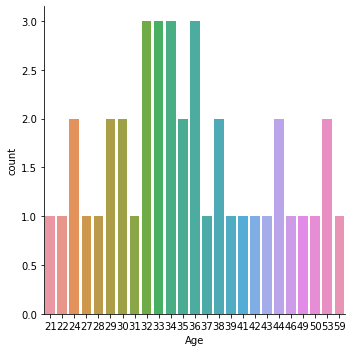

In [16]:
sns.catplot(data = hr[:40], x = "Age", kind = "count")

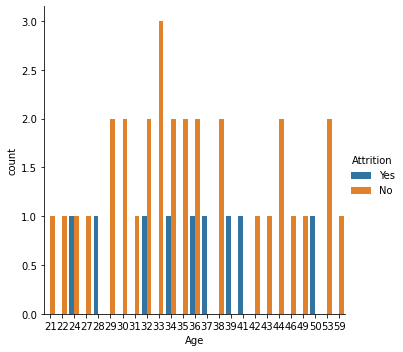

In [17]:
sns.catplot(data = hr[:40], x = "Age", hue = "Attrition", kind = "count")

### Attrition

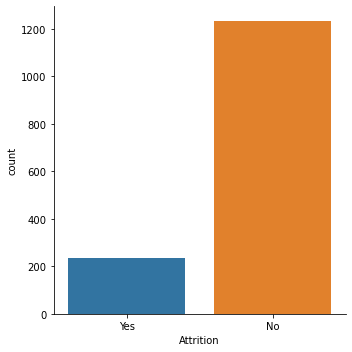

In [18]:
sns.catplot(data = hr, x = "Attrition", kind = "count")

### BusinessTravel 

BusinessTravel     Attrition
Non-Travel         No           138
                   Yes           12
Travel_Frequently  No           208
                   Yes           69
Travel_Rarely      No           887
                   Yes          156
Name: Attrition, dtype: int64


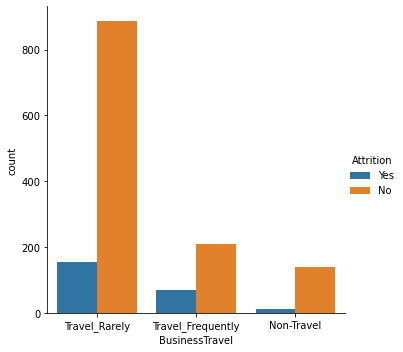

In [19]:
print(hr.groupby("BusinessTravel")["Attrition"].value_counts())
sns.catplot(data = hr, x = "BusinessTravel", hue = "Attrition", kind = "count")

### Daily Rate

DailyRate  Attrition
102        No           1
103        Yes          1
104        Yes          1
105        No           1
106        No           1
                       ..
1495       No           3
1496       No           1
           Yes          1
1498       No           1
1499       No           1
Name: Attrition, Length: 1021, dtype: int64


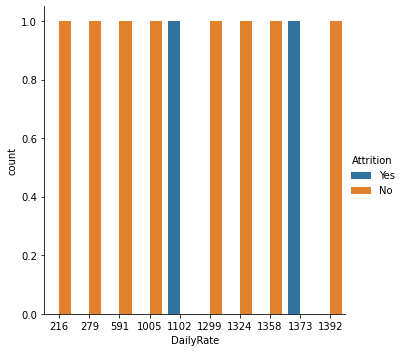

In [20]:
print(hr.groupby("DailyRate")["Attrition"].value_counts())
sns.catplot(data = hr[:10], x = "DailyRate", hue = "Attrition", kind = "count")

### Department

Department              Attrition
Human Resources         No            51
                        Yes           12
Research & Development  No           828
                        Yes          133
Sales                   No           354
                        Yes           92
Name: Attrition, dtype: int64


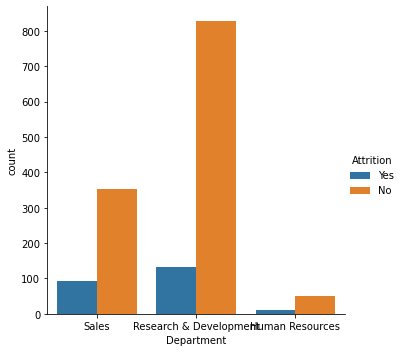

In [21]:
print(hr.groupby("Department")["Attrition"].value_counts())
sns.catplot(data = hr, x = "Department", hue = "Attrition", kind = "count")

### DistanceFromHome

DistanceFromHome  Attrition
1                 No           182
                  Yes           26
2                 No           183
                  Yes           28
3                 No            70
                  Yes           14
4                 No            55
                  Yes            9
5                 No            55
                  Yes           10
6                 No            52
                  Yes            7
7                 No            73
                  Yes           11
8                 No            70
                  Yes           10
9                 No            67
                  Yes           18
10                No            75
                  Yes           11
11                No            25
                  Yes            4
12                No            14
                  Yes            6
13                No            13
                  Yes            6
14                No            17
                  Yes      

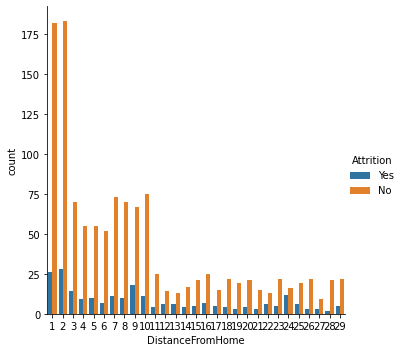

In [22]:
print(hr.groupby("DistanceFromHome")["Attrition"].value_counts())
sns.catplot(data = hr, x = "DistanceFromHome", hue = "Attrition", kind = "count")

### Education

Education  Attrition
1          No           139
           Yes           31
2          No           238
           Yes           44
3          No           473
           Yes           99
4          No           340
           Yes           58
5          No            43
           Yes            5
Name: Attrition, dtype: int64


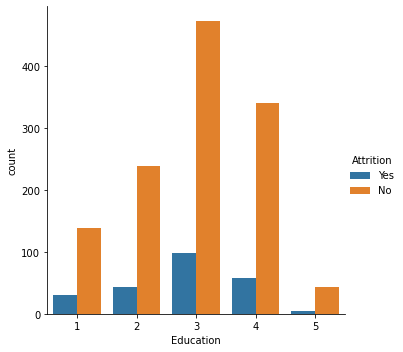

In [23]:
print(hr.groupby("Education")["Attrition"].value_counts())
sns.catplot(data = hr, x = "Education", hue = "Attrition", kind = "count")

### EducationField

EducationField    Attrition
Human Resources   No            20
                  Yes            7
Life Sciences     No           517
                  Yes           89
Marketing         No           124
                  Yes           35
Medical           No           401
                  Yes           63
Other             No            71
                  Yes           11
Technical Degree  No           100
                  Yes           32
Name: Attrition, dtype: int64


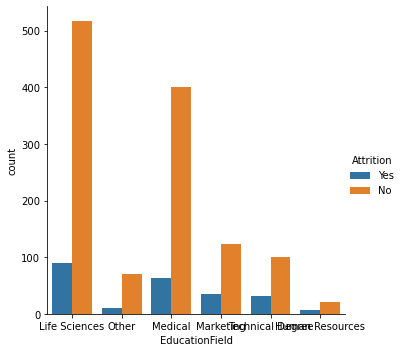

In [24]:
print(hr.groupby("EducationField")["Attrition"].value_counts())
sns.catplot(data = hr, x = "EducationField", hue = "Attrition", kind = "count")

### EmployeeCount

EmployeeCount  Attrition
1              No           1233
               Yes           237
Name: Attrition, dtype: int64


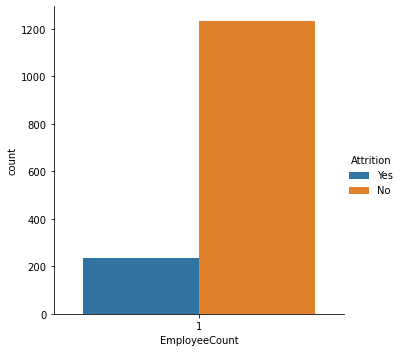

In [25]:
print(hr.groupby("EmployeeCount")["Attrition"].value_counts())
sns.catplot(data = hr, x = "EmployeeCount", hue = "Attrition", kind = "count")

### EmployeeNumber

EmployeeNumber  Attrition
1               Yes          1
2               No           1
4               Yes          1
5               No           1
7               No           1
                            ..
2061            No           1
2062            No           1
2064            No           1
2065            No           1
2068            No           1
Name: Attrition, Length: 1470, dtype: int64


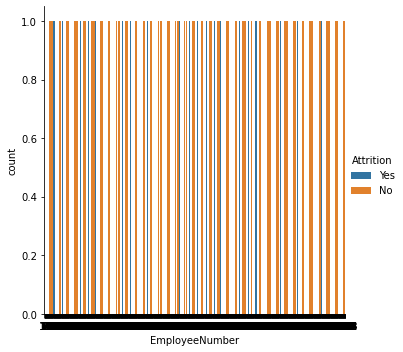

In [26]:
print(hr.groupby("EmployeeNumber")["Attrition"].value_counts())
sns.catplot(data = hr, x = "EmployeeNumber", hue = "Attrition", kind = "count")

### EnvironmentSatisfaction

EnvironmentSatisfaction  Attrition
1                        No           212
                         Yes           72
2                        No           244
                         Yes           43
3                        No           391
                         Yes           62
4                        No           386
                         Yes           60
Name: Attrition, dtype: int64


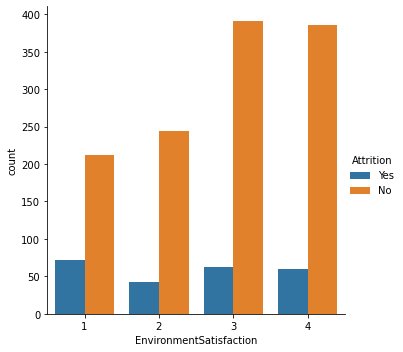

In [27]:
print(hr.groupby("EnvironmentSatisfaction")["Attrition"].value_counts())
sns.catplot(data = hr, x = "EnvironmentSatisfaction", hue = "Attrition", kind = "count")

### Gender

Gender  Attrition
Female  No           501
        Yes           87
Male    No           732
        Yes          150
Name: Attrition, dtype: int64


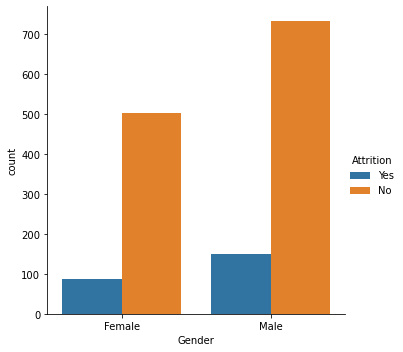

In [28]:
print(hr.groupby("Gender")["Attrition"].value_counts())
sns.catplot(data = hr, x = "Gender", hue = "Attrition", kind = "count")

### HourlyRate

HourlyRate  Attrition
30          No           19
31          No           13
            Yes           2
32          No           20
            Yes           4
                         ..
98          Yes           3
99          No           16
            Yes           4
100         No           14
            Yes           5
Name: Attrition, Length: 140, dtype: int64


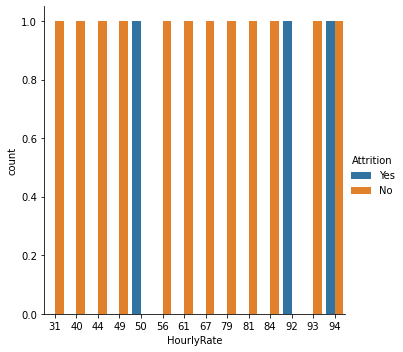

In [29]:
print(hr.groupby("HourlyRate")["Attrition"].value_counts())
sns.catplot(data = hr[:15], x = "HourlyRate", hue = "Attrition", kind = "count")

### JobInvolvement

JobInvolvement  Attrition
1               No            55
                Yes           28
2               No           304
                Yes           71
3               No           743
                Yes          125
4               No           131
                Yes           13
Name: Attrition, dtype: int64


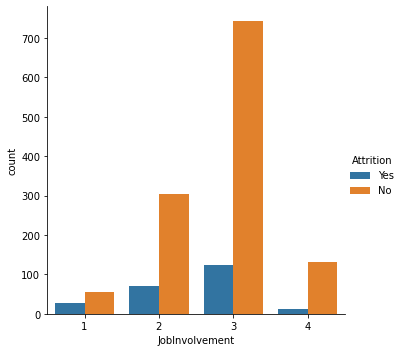

In [30]:
print(hr.groupby("JobInvolvement")["Attrition"].value_counts())
sns.catplot(data = hr, x = "JobInvolvement", hue = "Attrition", kind = "count")

### JobLevel

JobLevel  Attrition
1         No           400
          Yes          143
2         No           482
          Yes           52
3         No           186
          Yes           32
4         No           101
          Yes            5
5         No            64
          Yes            5
Name: Attrition, dtype: int64


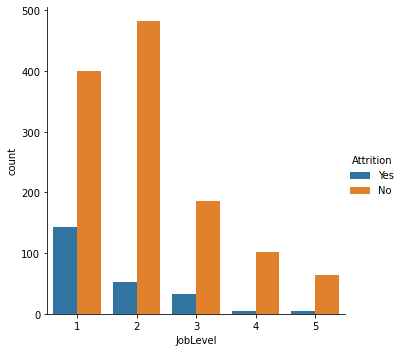

In [31]:
print(hr.groupby("JobLevel")["Attrition"].value_counts())
sns.catplot(data = hr, x = "JobLevel", hue = "Attrition", kind = "count")

### JobRole

JobRole                    Attrition
Healthcare Representative  No           122
                           Yes            9
Human Resources            No            40
                           Yes           12
Laboratory Technician      No           197
                           Yes           62
Manager                    No            97
                           Yes            5
Manufacturing Director     No           135
                           Yes           10
Research Director          No            78
                           Yes            2
Research Scientist         No           245
                           Yes           47
Sales Executive            No           269
                           Yes           57
Sales Representative       No            50
                           Yes           33
Name: Attrition, dtype: int64


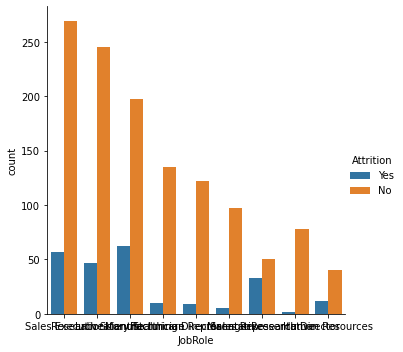

In [32]:
print(hr.groupby("JobRole")["Attrition"].value_counts())
sns.catplot(data = hr, x = "JobRole", hue = "Attrition", kind = "count")

### JobSatisfaction

JobSatisfaction  Attrition
1                No           223
                 Yes           66
2                No           234
                 Yes           46
3                No           369
                 Yes           73
4                No           407
                 Yes           52
Name: Attrition, dtype: int64


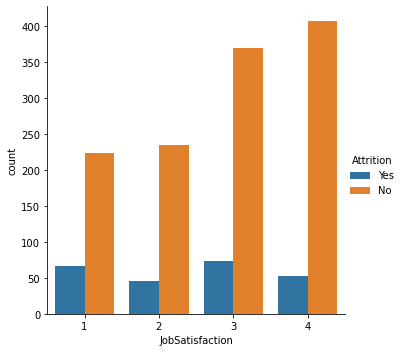

In [33]:
print(hr.groupby("JobSatisfaction")["Attrition"].value_counts())
sns.catplot(data = hr, x = "JobSatisfaction", hue = "Attrition", kind = "count")

### MaritalStatus

MaritalStatus  Attrition
Divorced       No           294
               Yes           33
Married        No           589
               Yes           84
Single         No           350
               Yes          120
Name: Attrition, dtype: int64


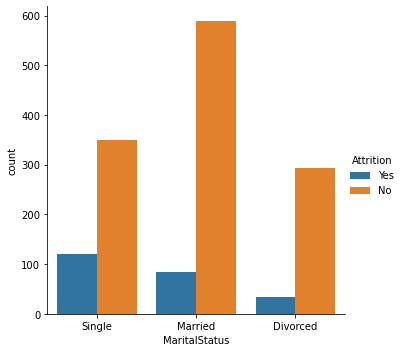

In [34]:
print(hr.groupby("MaritalStatus")["Attrition"].value_counts())
sns.catplot(data = hr, x = "MaritalStatus", hue = "Attrition", kind = "count")

### MonthlyIncome

MonthlyIncome  Attrition
1009           Yes          1
1051           No           1
1052           No           1
1081           Yes          1
1091           Yes          1
                           ..
19859          Yes          1
19926          No           1
19943          No           1
19973          No           1
19999          No           1
Name: Attrition, Length: 1388, dtype: int64


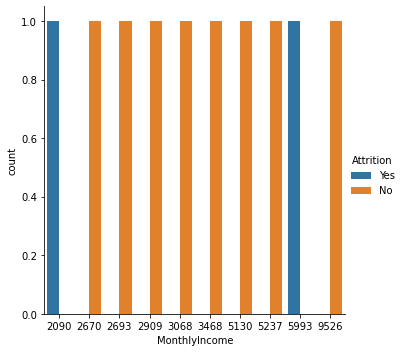

In [35]:
print(hr.groupby("MonthlyIncome")["Attrition"].value_counts())
sns.catplot(data = hr[:10], x = "MonthlyIncome", hue = "Attrition", kind = "count")

### MonthlyRate

MonthlyRate  Attrition
2094         No           1
2097         No           1
2104         No           1
2112         No           1
2122         No           1
                         ..
26956        Yes          1
26959        Yes          1
26968        No           1
26997        No           1
26999        Yes          1
Name: Attrition, Length: 1444, dtype: int64


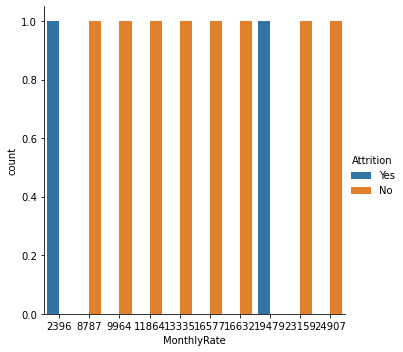

In [36]:
print(hr.groupby("MonthlyRate")["Attrition"].value_counts())
sns.catplot(data = hr[:10], x = "MonthlyRate", hue = "Attrition", kind = "count")

### NumCompaniesWorked

NumCompaniesWorked  Attrition
0                   No           174
                    Yes           23
1                   No           423
                    Yes           98
2                   No           130
                    Yes           16
3                   No           143
                    Yes           16
4                   No           122
                    Yes           17
5                   No            47
                    Yes           16
6                   No            54
                    Yes           16
7                   No            57
                    Yes           17
8                   No            43
                    Yes            6
9                   No            40
                    Yes           12
Name: Attrition, dtype: int64


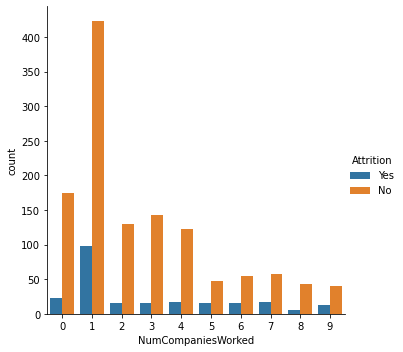

In [37]:
print(hr.groupby("NumCompaniesWorked")["Attrition"].value_counts())
sns.catplot(data = hr, x = "NumCompaniesWorked", hue = "Attrition", kind = "count")

### Over18

Over18  Attrition
Y       No           1233
        Yes           237
Name: Attrition, dtype: int64


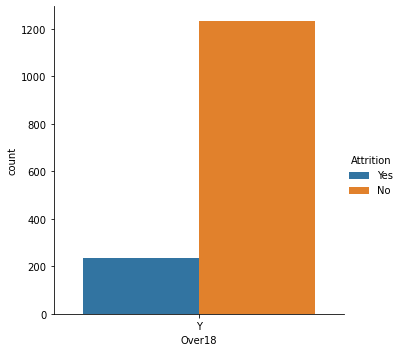

In [38]:
print(hr.groupby("Over18")["Attrition"].value_counts())
sns.catplot(data = hr, x = "Over18", hue = "Attrition", kind = "count")

### OverTime

OverTime  Attrition
No        No           944
          Yes          110
Yes       No           289
          Yes          127
Name: Attrition, dtype: int64


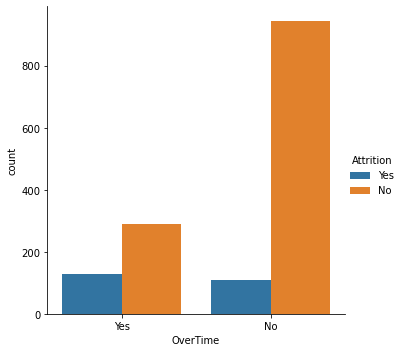

In [39]:
print(hr.groupby("OverTime")["Attrition"].value_counts())
sns.catplot(data = hr, x = "OverTime", hue = "Attrition", kind = "count")

### PercentSalaryHike

PercentSalaryHike  Attrition
11                 No           169
                   Yes           41
12                 No           165
                   Yes           33
13                 No           175
                   Yes           34
14                 No           177
                   Yes           24
15                 No            83
                   Yes           18
16                 No            64
                   Yes           14
17                 No            68
                   Yes           14
18                 No            76
                   Yes           13
19                 No            67
                   Yes            9
20                 No            48
                   Yes            7
21                 No            43
                   Yes            5
22                 No            44
                   Yes           12
23                 No            22
                   Yes            6
24                 No            15

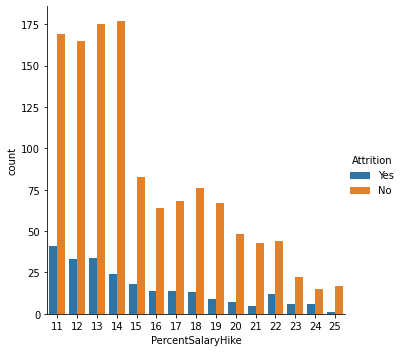

In [40]:
print(hr.groupby("PercentSalaryHike")["Attrition"].value_counts())
sns.catplot(data = hr, x = "PercentSalaryHike", hue = "Attrition", kind = "count")

### PerformanceRating

PerformanceRating  Attrition
3                  No           1044
                   Yes           200
4                  No            189
                   Yes            37
Name: Attrition, dtype: int64


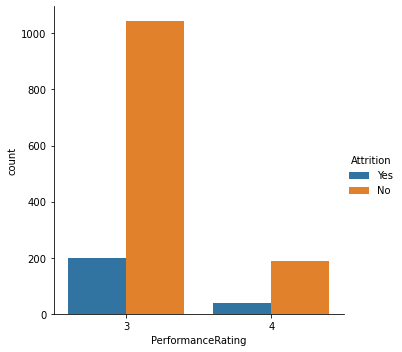

In [41]:
print(hr.groupby("PerformanceRating")["Attrition"].value_counts())
sns.catplot(data = hr, x = "PerformanceRating", hue = "Attrition", kind = "count")

### RelationshipSatisfaction

RelationshipSatisfaction  Attrition
1                         No           219
                          Yes           57
2                         No           258
                          Yes           45
3                         No           388
                          Yes           71
4                         No           368
                          Yes           64
Name: Attrition, dtype: int64


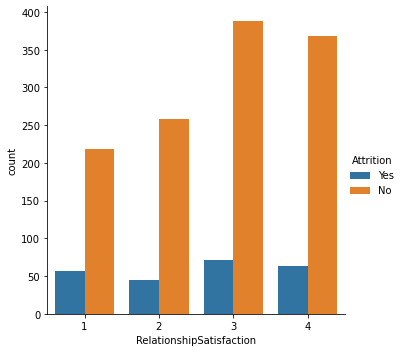

In [42]:
print(hr.groupby("RelationshipSatisfaction")["Attrition"].value_counts())
sns.catplot(data = hr, x = "RelationshipSatisfaction", hue = "Attrition", kind = "count")

### StandardHours

StandardHours  Attrition
80             No           1233
               Yes           237
Name: Attrition, dtype: int64


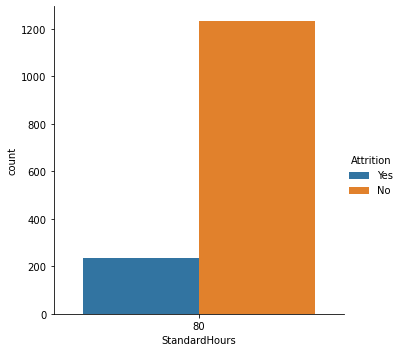

In [43]:
print(hr.groupby("StandardHours")["Attrition"].value_counts())
sns.catplot(data = hr, x = "StandardHours", hue = "Attrition", kind = "count")

### StockOptionLevel

StockOptionLevel  Attrition
0                 No           477
                  Yes          154
1                 No           540
                  Yes           56
2                 No           146
                  Yes           12
3                 No            70
                  Yes           15
Name: Attrition, dtype: int64


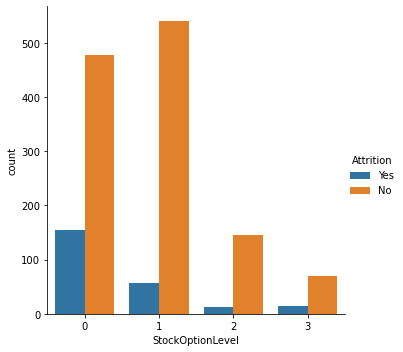

In [44]:
print(hr.groupby("StockOptionLevel")["Attrition"].value_counts())
sns.catplot(data = hr, x = "StockOptionLevel", hue = "Attrition", kind = "count")

### TotalWorkingYears

TotalWorkingYears  Attrition
0                  No            6
                   Yes           5
1                  No           41
                   Yes          40
2                  No           22
                                ..
35                 No            3
36                 No            6
37                 No            4
38                 No            1
40                 Yes           2
Name: Attrition, Length: 71, dtype: int64


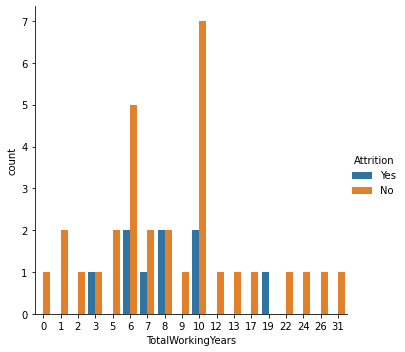

In [45]:
print(hr.groupby("TotalWorkingYears")["Attrition"].value_counts())
sns.catplot(data = hr[:40], x = "TotalWorkingYears", hue = "Attrition", kind = "count")

### TrainingTimesLastYear

TrainingTimesLastYear  Attrition
0                      No            39
                       Yes           15
1                      No            62
                       Yes            9
2                      No           449
                       Yes           98
3                      No           422
                       Yes           69
4                      No            97
                       Yes           26
5                      No           105
                       Yes           14
6                      No            59
                       Yes            6
Name: Attrition, dtype: int64


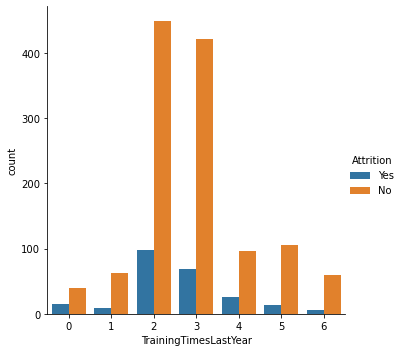

In [46]:
print(hr.groupby("TrainingTimesLastYear")["Attrition"].value_counts())
sns.catplot(data = hr, x = "TrainingTimesLastYear", hue = "Attrition", kind = "count")

### WorkLifeBalance

WorkLifeBalance  Attrition
1                No            55
                 Yes           25
2                No           286
                 Yes           58
3                No           766
                 Yes          127
4                No           126
                 Yes           27
Name: Attrition, dtype: int64


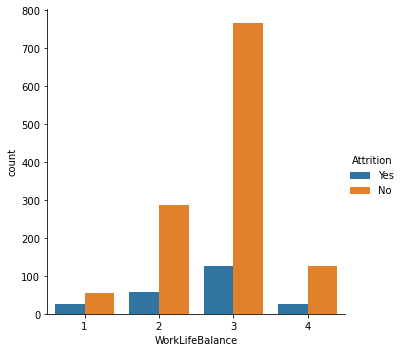

In [47]:
print(hr.groupby("WorkLifeBalance")["Attrition"].value_counts())
sns.catplot(data = hr, x = "WorkLifeBalance", hue = "Attrition", kind = "count")

### YearsAtCompany

YearsAtCompany  Attrition
0               No            28
                Yes           16
1               No           112
                Yes           59
2               No           100
                            ... 
33              Yes            1
34              No             1
36              No             2
37              No             1
40              Yes            1
Name: Attrition, Length: 64, dtype: int64


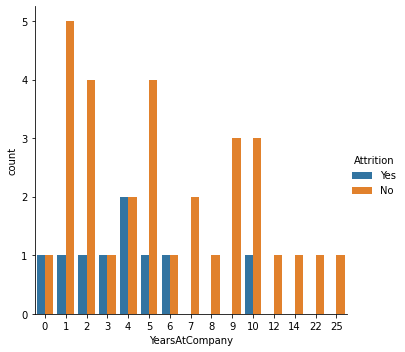

In [48]:
print(hr.groupby("YearsAtCompany")["Attrition"].value_counts())
sns.catplot(data = hr[:40], x = "YearsAtCompany", hue = "Attrition", kind = "count")

### YearsInCurrentRole

YearsInCurrentRole  Attrition
0                   No           171
                    Yes           73
1                   No            46
                    Yes           11
2                   No           304
                    Yes           68
3                   No           119
                    Yes           16
4                   No            89
                    Yes           15
5                   No            35
                    Yes            1
6                   No            35
                    Yes            2
7                   No           191
                    Yes           31
8                   No            82
                    Yes            7
9                   No            61
                    Yes            6
10                  No            27
                    Yes            2
11                  No            22
12                  No             9
                    Yes            1
13                  No            13
        

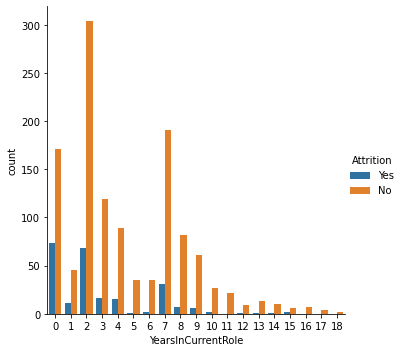

In [49]:
print(hr.groupby("YearsInCurrentRole")["Attrition"].value_counts())
sns.catplot(data = hr, x = "YearsInCurrentRole", hue = "Attrition", kind = "count")

### YearsSinceLastPromotion

YearsSinceLastPromotion  Attrition
0                        No           471
                         Yes          110
1                        No           308
                         Yes           49
2                        No           132
                         Yes           27
3                        No            43
                         Yes            9
4                        No            56
                         Yes            5
5                        No            43
                         Yes            2
6                        No            26
                         Yes            6
7                        No            60
                         Yes           16
8                        No            18
9                        No            13
                         Yes            4
10                       No             5
                         Yes            1
11                       No            22
                         Yes            2

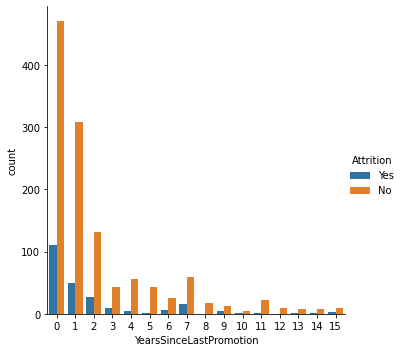

In [50]:
print(hr.groupby("YearsSinceLastPromotion")["Attrition"].value_counts())
sns.catplot(data = hr, x = "YearsSinceLastPromotion", hue = "Attrition", kind = "count")

### YearsWithCurrManager

YearsWithCurrManager  Attrition
0                     No           178
                      Yes           85
1                     No            65
                      Yes           11
2                     No           294
                      Yes           50
3                     No           123
                      Yes           19
4                     No            87
                      Yes           11
5                     No            27
                      Yes            4
6                     No            25
                      Yes            4
7                     No           185
                      Yes           31
8                     No            97
                      Yes           10
9                     No            58
                      Yes            6
10                    No            24
                      Yes            3
11                    No            21
                      Yes            1
12                    No        

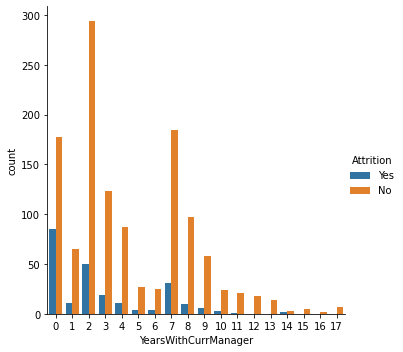

In [51]:
print(hr.groupby("YearsWithCurrManager")["Attrition"].value_counts())
sns.catplot(data = hr, x = "YearsWithCurrManager", hue = "Attrition", kind = "count")

In [37]:
hr.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [38]:
hr.shape

(1470, 35)

In [39]:
hr = hr.drop(['EmployeeCount',
                 'EmployeeNumber',
                 'Over18',
                  'StandardHours'],axis = 1)

In [40]:
hr.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [41]:
hr.shape

(1470, 31)

## FEATURE ENGINEERING

In [42]:
X = hr.drop("Attrition",axis=1)
y = hr["Attrition"]

In [43]:
hr.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train.shape, X_test.shape

((1029, 30), (441, 30))

In [45]:
X_train.corr()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.007272,-0.015626,0.199236,0.008304,0.030212,0.028587,0.515066,0.019813,0.501744,...,0.009415,0.051561,0.034216,0.682786,-0.010961,-0.011040,0.327015,0.226492,0.210601,0.202227
DailyRate,0.007272,1.000000,-0.002225,0.001385,0.026616,0.023329,0.054426,-0.011192,0.046204,0.004523,...,-0.010546,0.001268,0.017413,0.009257,-0.017388,-0.002895,-0.037268,0.013937,-0.034378,-0.005696
DistanceFromHome,-0.015626,-0.002225,1.000000,-0.011130,-0.028572,0.033915,0.022555,0.010383,0.006233,-0.020628,...,0.006259,0.030211,0.077569,-0.002480,-0.062188,-0.020249,0.003062,0.012362,-0.003676,0.020429
Education,0.199236,0.001385,-0.011130,1.000000,-0.050004,-0.017961,0.050353,0.104115,0.022663,0.101777,...,-0.034011,0.005755,0.028215,0.142026,0.007064,0.013008,0.072522,0.057131,0.047969,0.055322
EnvironmentSatisfaction,0.008304,0.026616,-0.028572,-0.050004,1.000000,-0.055513,0.002638,0.005394,0.002098,-0.002278,...,-0.016941,0.023992,-0.003129,-0.009690,-0.016054,0.035819,0.000260,0.032520,0.019459,-0.003556
HourlyRate,0.030212,0.023329,0.033915,-0.017961,-0.055513,1.000000,0.081939,-0.026950,-0.052501,-0.018247,...,0.008227,0.011174,0.042444,-0.004540,-0.012149,-0.023094,-0.015571,-0.014372,-0.011847,-0.015706
JobInvolvement,0.028587,0.054426,0.022555,0.050353,0.002638,0.081939,1.000000,0.008209,-0.016115,-0.001842,...,-0.047237,0.030644,0.032067,0.013754,-0.023274,-0.014829,-0.003491,0.005734,-0.010553,0.027960
JobLevel,0.515066,-0.011192,0.010383,0.104115,0.005394,-0.026950,0.008209,1.000000,0.012609,0.949780,...,-0.023794,0.001075,0.022050,0.783142,0.001935,0.059430,0.539982,0.398867,0.357383,0.381730
JobSatisfaction,0.019813,0.046204,0.006233,0.022663,0.002098,-0.052501,-0.016115,0.012609,1.000000,0.010616,...,0.014459,-0.033730,0.049600,-0.001324,-0.031104,-0.002801,-0.029937,-0.032372,-0.049607,-0.058723
MonthlyIncome,0.501744,0.004523,-0.020628,0.101777,-0.002278,-0.018247,-0.001842,0.949780,0.010616,1.000000,...,-0.017812,0.000101,0.011981,0.767788,0.001075,0.042181,0.521506,0.377688,0.355648,0.349325


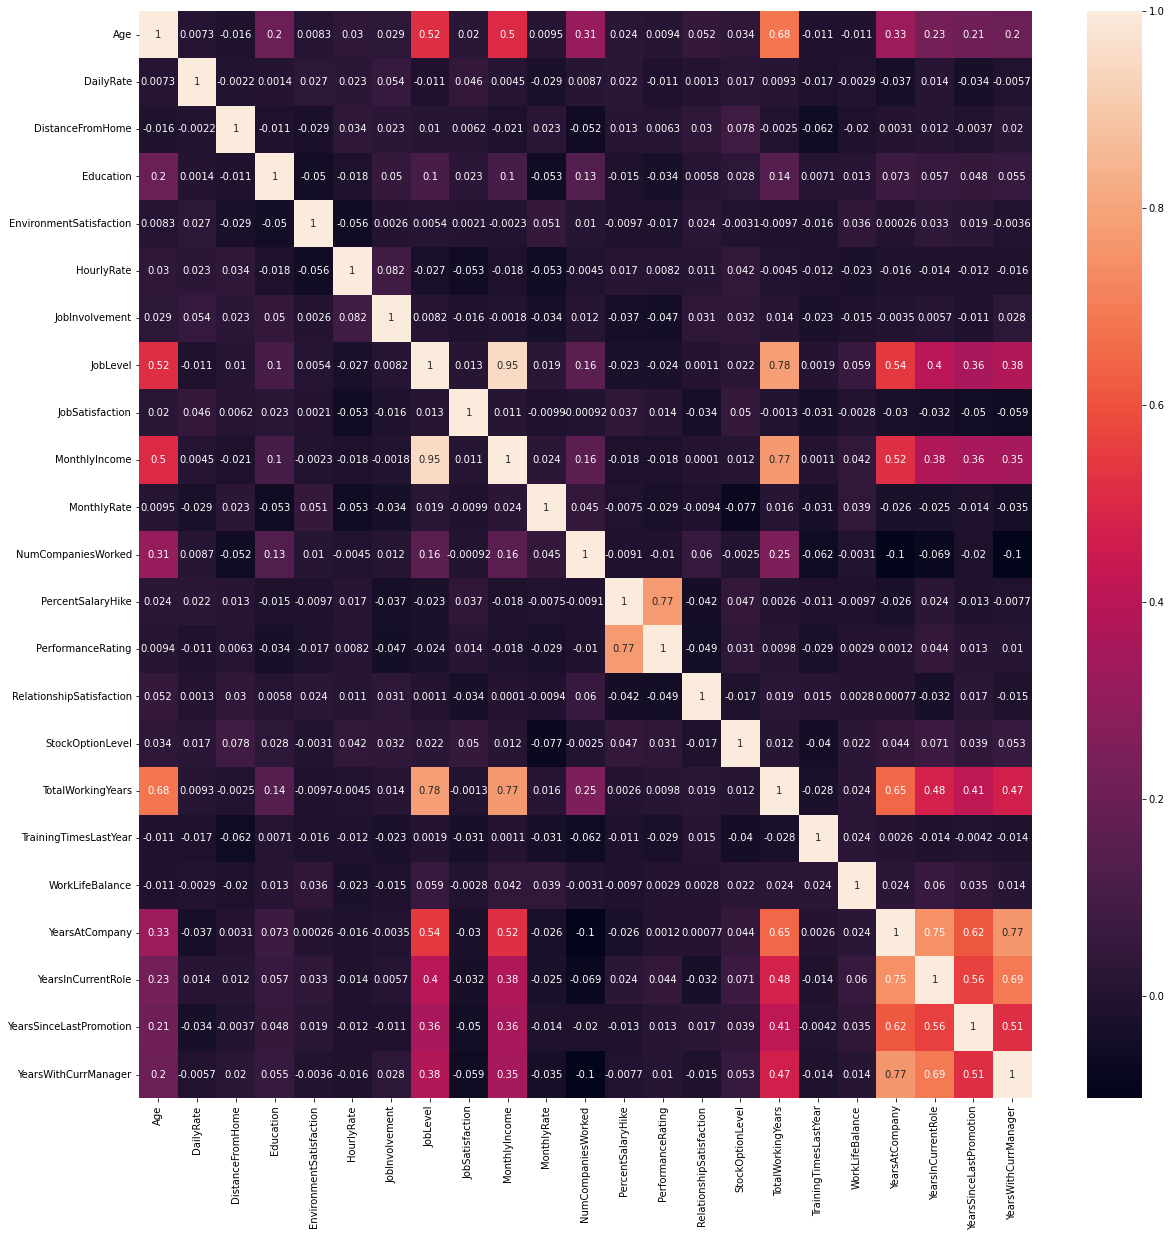

In [46]:
# Using Pearson Correlation
plt.figure(figsize=(20,20))
cor = X_train.corr()
sns.heatmap(cor, annot=True) #, cmap=plt.cm.CMRmap_r)
plt.show()

In [52]:
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of the redundant columns
    l=[]
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if(corr_matrix.iloc[i, j]) < threshold:
                l.append(corr_matrix.iloc[i, j])
                colname = corr_matrix.columns[j]
                col_corr.add(colname)
    return col_corr

In [93]:
corr_features = correlation(X_train, 0) # 85% is a good value of the threshold
print(len(corr_features))
print(corr_features)

35
{'JobRole_Research Scientist', 'EducationField_Technical Degree', 'Department_Human Resources', 'MaritalStatus_Divorced', 'WorkLifeBalance_1', 'YearsAtCompany', 'JobRole_Healthcare Representative', 'Gender_Male', 'BusinessTravel_Travel_Frequently', 'WorkLifeBalance_3', 'YearsWithCurrManager', 'JobRole_Sales Executive', 'EducationField_Medical', 'Gender_Female', 'Department_Research & Development', 'BusinessTravel_Travel_Rarely', 'EducationField_Life Sciences', 'MaritalStatus_Single', 'EducationField_Marketing', 'JobRole_Laboratory Technician', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'OverTime_No', 'WorkLifeBalance_2', 'JobRole_Manufacturing Director', 'JobRole_Research Director', 'EducationField_Human Resources', 'JobRole_Sales Representative', 'JobRole_Human Resources', 'MaritalStatus_Married', 'JobRole_Manager', 'BusinessTravel_Non-Travel', 'EducationField_Other', 'Department_Sales', 'OverTime_Yes'}


In [57]:
hr.drop(columns = ['RelationshipSatisfaction', 'JobInvolvement', 'TotalWorkingYears', 'JobLevel', 'MonthlyRate', 'PerformanceRating', 'MonthlyIncome', 'TrainingTimesLastYear', 'PercentSalaryHike', 'EnvironmentSatisfaction', 'Age', 'StockOptionLevel', 'NumCompaniesWorked', 'Education', 'JobSatisfaction', 'DailyRate', 'DistanceFromHome', 'HourlyRate'],inplace=True)

In [58]:
hr.shape

(1470, 13)

## ONE HOT ENCODING

In [59]:
print(hr.dtypes)

Attrition                  object
BusinessTravel             object
Department                 object
EducationField             object
Gender                     object
JobRole                    object
MaritalStatus              object
OverTime                   object
WorkLifeBalance             int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLastPromotion     int64
YearsWithCurrManager        int64
dtype: object


In [60]:
# s = pd.Series(list('abca'))
# print(s)
# print(pd.get_dummies(s))

In [61]:
for column in hr.columns:
    unique_vals = hr[column].unique()
    length = len(unique_vals)
    print("The number of values for feature {}: {} ---> {}".format(column, length, unique_vals))

The number of values for feature Attrition: 2 ---> ['Yes' 'No']
The number of values for feature BusinessTravel: 3 ---> ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
The number of values for feature Department: 3 ---> ['Sales' 'Research & Development' 'Human Resources']
The number of values for feature EducationField: 6 ---> ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
The number of values for feature Gender: 2 ---> ['Female' 'Male']
The number of values for feature JobRole: 9 ---> ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
The number of values for feature MaritalStatus: 3 ---> ['Single' 'Married' 'Divorced']
The number of values for feature OverTime: 2 ---> ['Yes' 'No']
The number of values for feature WorkLifeBalance: 4 ---> [1 3 2 4]
The number of values for feature YearsAtCompany: 37 ---> [ 

In [69]:
# hr1 = pd.get_dummies(hr, columns = ['BusinessTravel', 'Department','Education', 'EducationField','EnvironmentSatisfaction'
#       , 'Gender', 'JobInvolvement', 'JobRole', 'JobSatisfaction','MaritalStatus','NumCompaniesWorked', 'OverTime',
#       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel','TrainingTimesLastYear', 'WorkLifeBalance'])

In [65]:
hr1 = pd.get_dummies(hr, columns = ['BusinessTravel', 'Department','EducationField'
      , 'Gender', 'JobRole', 'MaritalStatus', 'OverTime',
      'WorkLifeBalance'])

In [66]:
print(hr1.shape)

(1470, 37)


In [67]:
list(hr1.columns)

['Attrition',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'BusinessTravel_Non-Travel',
 'BusinessTravel_Travel_Frequently',
 'BusinessTravel_Travel_Rarely',
 'Department_Human Resources',
 'Department_Research & Development',
 'Department_Sales',
 'EducationField_Human Resources',
 'EducationField_Life Sciences',
 'EducationField_Marketing',
 'EducationField_Medical',
 'EducationField_Other',
 'EducationField_Technical Degree',
 'Gender_Female',
 'Gender_Male',
 'JobRole_Healthcare Representative',
 'JobRole_Human Resources',
 'JobRole_Laboratory Technician',
 'JobRole_Manager',
 'JobRole_Manufacturing Director',
 'JobRole_Research Director',
 'JobRole_Research Scientist',
 'JobRole_Sales Executive',
 'JobRole_Sales Representative',
 'MaritalStatus_Divorced',
 'MaritalStatus_Married',
 'MaritalStatus_Single',
 'OverTime_No',
 'OverTime_Yes',
 'WorkLifeBalance_1',
 'WorkLifeBalance_2',
 'WorkLifeBalance_3',
 'WorkLifeBalance_4']

## DATA RESAMPLING

In [68]:
hr1

,Attrition,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,...,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes,WorkLifeBalance_1,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4
0,Yes,6,4,0,5,0,0,1,0,0,...,0,0,0,1,0,1,1,0,0,0
1,No,10,7,1,7,0,1,0,0,1,...,0,0,1,0,1,0,0,0,1,0
2,Yes,0,0,0,0,0,0,1,0,1,...,0,0,0,1,0,1,0,0,1,0
3,No,8,7,3,0,0,1,0,0,1,...,0,0,1,0,0,1,0,0,1,0
4,No,2,2,2,2,0,0,1,0,1,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,No,5,2,0,3,0,1,0,0,1,...,0,0,1,0,1,0,0,0,1,0
1466,No,7,7,1,7,0,0,1,0,1,...,0,0,1,0,1,0,0,0,1,0
1467,No,6,2,0,3,0,0,1,0,1,...,0,0,1,0,0,1,0,0,1,0
1468,No,9,6,0,8,0,1,0,0,0,...,0,0,1,0,1,0,0,1,0,0


In [69]:
X = hr1.drop(['Attrition'], axis=1)
y = hr1['Attrition']
for col in hr1.columns:
    print(col)

Attrition
YearsAtCompany
YearsInCurrentRole
YearsSinceLastPromotion
YearsWithCurrManager
BusinessTravel_Non-Travel
BusinessTravel_Travel_Frequently
BusinessTravel_Travel_Rarely
Department_Human Resources
Department_Research & Development
Department_Sales
EducationField_Human Resources
EducationField_Life Sciences
EducationField_Marketing
EducationField_Medical
EducationField_Other
EducationField_Technical Degree
Gender_Female
Gender_Male
JobRole_Healthcare Representative
JobRole_Human Resources
JobRole_Laboratory Technician
JobRole_Manager
JobRole_Manufacturing Director
JobRole_Research Director
JobRole_Research Scientist
JobRole_Sales Executive
JobRole_Sales Representative
MaritalStatus_Divorced
MaritalStatus_Married
MaritalStatus_Single
OverTime_No
OverTime_Yes
WorkLifeBalance_1
WorkLifeBalance_2
WorkLifeBalance_3
WorkLifeBalance_4


In [70]:
# Apply SMOTE to the dataset
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [71]:
X_resampled

,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,...,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes,WorkLifeBalance_1,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4
0,6,4,0,5,0,0,1,0,0,1,...,0,0,0,1,0,1,1,0,0,0
1,10,7,1,7,0,1,0,0,1,0,...,0,0,1,0,1,0,0,0,1,0
2,0,0,0,0,0,0,1,0,1,0,...,0,0,0,1,0,1,0,0,1,0
3,8,7,3,0,0,1,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0
4,2,2,2,2,0,0,1,0,1,0,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2461,10,9,5,8,0,0,1,0,1,0,...,0,0,0,0,0,1,0,1,0,0
2462,5,2,0,3,0,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0
2463,2,2,2,2,0,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2464,1,0,0,0,0,0,1,0,0,1,...,1,0,0,1,1,0,0,0,0,0


In [72]:
y_resampled

0       Yes
1        No
2       Yes
3        No
4        No
       ... 
2461    Yes
2462    Yes
2463    Yes
2464    Yes
2465    Yes
Name: Attrition, Length: 2466, dtype: object

In [73]:
counter = Counter(hr1["Attrition"])
print(counter)

Counter({'No': 1233, 'Yes': 237})


<AxesSubplot:>

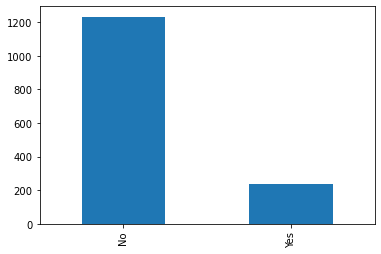

In [74]:
hr1['Attrition'].value_counts().plot(kind='bar')

In [75]:
counter=Counter(y_resampled)
print(counter)

Counter({'Yes': 1233, 'No': 1233})


<AxesSubplot:>

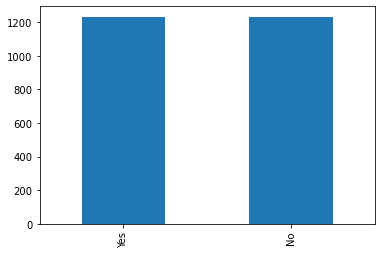

In [76]:
y_resampled.value_counts().plot(kind='bar')

## SCALING THE DATASET

In [77]:
X = X_resampled
y = y_resampled # Target Variable

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.50, random_state = 1)

In [83]:
# scale = ['Age', 'DailyRate', 'DistanceFromHome','HourlyRate','MonthlyIncome', 'MonthlyRate','PercentSalaryHike',
#                'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager',
#  'YearsSinceLastPromotion']
# scaler = MinMaxScaler()

In [83]:
scale = ['YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager', 'YearsSinceLastPromotion']
scaler = MinMaxScaler()

In [ ]:
# scale = ['Age', 'DailyRate', 'DistanceFromHome','HourlyRate','MonthlyIncome', 'MonthlyRate','PercentSalaryHike',
#                'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager',
#  'YearsSinceLastPromotion']
# scaler = MinMaxScaler()

In [84]:
scaler.fit(X_train[scale])
X_train[scale] = scaler.transform(X_train[scale])
X_test[scale] = scaler.transform(X_test[scale])

In [85]:
X_train.head(10)

,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,...,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes,WorkLifeBalance_1,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4
79,0.111111,0.117647,0.000000,0.117647,0,0,1,1,0,0,...,0,1,0,0,0,1,0,0,1,0
593,0.250000,0.411765,0.000000,0.294118,0,0,1,0,1,0,...,0,0,1,0,1,0,0,0,1,0
2047,0.194444,0.411765,0.000000,0.411765,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
1260,0.194444,0.411765,0.000000,0.411765,1,0,0,0,1,0,...,0,0,0,1,1,0,0,0,1,0
491,0.222222,0.411765,0.266667,0.411765,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
988,0.166667,0.117647,0.200000,0.176471,0,1,0,0,1,0,...,0,1,0,0,0,1,0,1,0,0
1326,0.055556,0.117647,0.133333,0.117647,0,0,1,0,0,1,...,0,0,0,1,0,1,0,1,0,0
1546,0.055556,0.117647,0.066667,0.117647,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
824,0.027778,0.000000,0.000000,0.000000,0,0,1,0,1,0,...,0,0,0,1,1,0,0,0,1,0
494,0.222222,0.117647,0.000000,0.352941,0,0,1,0,0,1,...,1,1,0,0,0,1,0,0,1,0


In [87]:
X_test.head(10)

,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,...,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes,WorkLifeBalance_1,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4
481,0.166667,0.294118,0.066667,0.176471,0,0,1,0,1,0,...,0,0,1,0,0,1,0,0,1,0
1976,0.055556,0.117647,0.133333,0.117647,0,0,1,0,0,1,...,0,0,0,1,0,1,0,1,0,0
280,0.138889,0.176471,0.066667,0.176471,0,0,1,0,1,0,...,0,0,1,0,0,1,0,1,0,0
440,0.083333,0.117647,0.000000,0.117647,0,1,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
107,0.166667,0.235294,0.000000,0.176471,0,0,1,0,0,1,...,0,0,0,1,0,1,0,0,1,0
768,0.194444,0.411765,0.466667,0.294118,0,0,1,0,0,1,...,0,0,1,0,1,0,0,1,0,0
2208,0.277778,0.529412,0.333333,0.470588,0,0,1,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1233,0.277778,0.000000,0.000000,0.470588,0,0,1,0,1,0,...,0,0,1,0,1,0,0,1,0,0
1695,0.027778,0.000000,0.000000,0.000000,0,0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
2040,0.861111,0.823529,0.533333,0.470588,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## Classification model

In [88]:
rm = RandomForestClassifier(random_state=42)

In [89]:
rm.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [90]:
prediction=rm.predict(X_train)
score1=accuracy_score(y_train,prediction)
print(len(prediction))
print(prediction[:50])

1233
['No' 'No' 'Yes' 'No' 'No' 'No' 'Yes' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'Yes' 'Yes' 'No' 'No' 'Yes'
 'No' 'Yes' 'No' 'No' 'Yes' 'No' 'No' 'Yes' 'No' 'Yes' 'Yes' 'No' 'Yes'
 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes' 'No' 'No' 'Yes' 'No']


In [91]:
y_pred=rm.predict(X_test)
score=accuracy_score(y_test,y_pred)
print(len(y_pred))
print(y_pred[:50])

1233
['No' 'Yes' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes'
 'No' 'No' 'No' 'Yes' 'No' 'Yes' 'Yes' 'No' 'No' 'No' 'Yes' 'No' 'Yes'
 'No' 'No' 'Yes' 'No' 'Yes' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'Yes' 'No' 'No']


In [92]:
print("training data accuracy is : %f" % (score1))
print("test data accuracy is : %f" % (score))

training data accuracy is : 1.000000
test data accuracy is : 0.901865


In [94]:
# svc = SVC()
# svc.fit(X_train, y_train)

In [ ]:
l = ["Age", "BusinessTravel", "DailyRate", "Department", "DistanceFromHome", "Education", "EducationField", 
     "EnvironmentSatisfaction", "Gender", "HourlyRate", "JobInvolvement", "JobRole", "JobSatisfaction", "MaritalStatus", 
    "MonthlyIncome", "MonthlyRate", "NumCompaniesWorked", "OverTime", "PercentSalaryHike", "PerformanceRating", 
     "RelationshipSatisfaction", "StockOptionLevel", "TotalWorkingYears", "TrainingTimesLastYear",
"WorkLifeBalance", "YearsAtCompany", "YearsInCurrentRole", "YearsSinceLastPromotion", "YearsWithCurrManager"]
str = ["BusinessTravel", "Department", "EducationField", "Gender", "JobRole", "MaritalStatus", "OverTime"]
p= []
for i, val in enumerate(l):
    print(val+": ")
    if val not in l:
        p.append(int(input()))
    else:
        if i==1:
            if val+"_"+input() == 'BusinessTravel_Non-Travel':
                p.append([1, 0, 0])
            elif val+"_"+input() == 'BusinessTravel_Travel_Frequently':
                p.append([0, 1, 0])
            else:
                p.append([0, 0, 1])
        elif i==3:
            if val+"_"+input() == 'Department_Human Resources':
                p.append([1, 0, 0])
            elif val+"_"+input() == 'Department_Research & Development':
                p.append([0, 1, 0])
            else:
                p.append([0, 0, 1])
        elif i==5:
            if val+"_"+input() == 'Education_1':
                p.append([1, 0, 0, 0, 0])
            elif val+"_"+input() == 'Education_2':
                p.append([0, 1, 0, 0, 0])
            elif val+"_"+input() == 'Education_3':
                p.append([0, 0, 1, 0, 0])
            elif val+"_"+input() == 'Education_4':
                p.append([0, 0, 0, 1, 0])
            else:
                p.append([0, 0, 0, 0, 1])
        elif i==6:
            if val+"_"+input() == 'EducationField_Human Resources':
                p.append([1, 0, 0, 0, 0, 0])
            elif val+"_"+input() == 'EducationField_Life Sciences':
                p.append([0, 1, 0, 0, 0, 0])
            elif val+"_"+input() == 'EducationField_Marketing':
                p.append([0, 0, 1, 0, 0, 0])
            elif val+"_"+input() == 'EducationField_Medical':
                p.append([0, 0, 0, 1, 0, 0])
            elif val+"_"+input() == 'EducationField_Other':
                p.append([0, 0, 0, 0, 1, 0])
            else:
                p.append([0, 0, 0, 0, 0, 1])

In [ ]:

 'EnvironmentSatisfaction_1',
 'EnvironmentSatisfaction_2',
 'EnvironmentSatisfaction_3',
 'EnvironmentSatisfaction_4',
    
 'Gender_Female',
 'Gender_Male',
    
 'JobInvolvement_1',
 'JobInvolvement_2',
 'JobInvolvement_3',
 'JobInvolvement_4',
    
 'JobRole_Healthcare Representative',
 'JobRole_Human Resources',
 'JobRole_Laboratory Technician',
 'JobRole_Manager',
 'JobRole_Manufacturing Director',
 'JobRole_Research Director',
 'JobRole_Research Scientist',
 'JobRole_Sales Executive',
 'JobRole_Sales Representative',

 'JobSatisfaction_1',
 'JobSatisfaction_2',
 'JobSatisfaction_3',
 'JobSatisfaction_4',

 'MaritalStatus_Divorced',
 'MaritalStatus_Married',
 'MaritalStatus_Single',
    
 'NumCompaniesWorked_0',
 'NumCompaniesWorked_1',
 'NumCompaniesWorked_2',
 'NumCompaniesWorked_3',
 'NumCompaniesWorked_4',
 'NumCompaniesWorked_5',
 'NumCompaniesWorked_6',
 'NumCompaniesWorked_7',
 'NumCompaniesWorked_8',
 'NumCompaniesWorked_9',
    
 'OverTime_No',
 'OverTime_Yes',
    
 'PerformanceRating_3',
 'PerformanceRating_4',
    
 'RelationshipSatisfaction_1',
 'RelationshipSatisfaction_2',
 'RelationshipSatisfaction_3',
 'RelationshipSatisfaction_4',
    
 'StockOptionLevel_0',
 'StockOptionLevel_1',
 'StockOptionLevel_2',
 'StockOptionLevel_3',
    
 'TrainingTimesLastYear_0',
 'TrainingTimesLastYear_1',
 'TrainingTimesLastYear_2',
 'TrainingTimesLastYear_3',
 'TrainingTimesLastYear_4',
 'TrainingTimesLastYear_5',
 'TrainingTimesLastYear_6',

 'WorkLifeBalance_1',
 'WorkLifeBalance_2',
 'WorkLifeBalance_3',
 'WorkLifeBalance_4']